In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import ipywidgets as widgets
from ipywidgets import interact

In [3]:
df = pd.read_csv('../Данные/out_w_date_an_orig.csv', parse_dates=True)

df['point_1'] = 0
df['point_2'] = 0
df['point_3'] = 0
for i in range(df.shape[0]):
    row = df.iloc[i]
    points = row['point'].split(',')
    df.loc[i, ['point_1']] = int(points[0])
    df.loc[i, ['point_2']] = int(points[1])
    df.loc[i, ['point_3']] = int(points[2])

df = df[(df['fintype_id'] == 1) & (df['eduform_id'] == 1)].reset_index(drop=True)
df = df.drop(['add_time', 'abiturient_id', 'eduform_id', 'ex', 'point', 'fintype_id'], axis=1)

In [4]:
df.head()

,status,id,name,true,point_1,point_2,point_3
0,1,33,Проектирование авиационных и ракетных двигателей,0,72,51,76
1,1,18,Ракетные комплексы и космонавтика,0,72,51,76
2,1,32,"Проектирование, производство и эксплуатация ра...",0,72,51,76
3,1,8,Лазерная техника и лазерные технологии,0,72,51,76
4,1,6,Оптотехника,0,72,51,76


In [5]:
def spec_distribution_true(spec):
    spec_df = df[df['name'] == spec]
    print('Нормированное' + '\n')
    print(pd.value_counts(spec_df['true'], normalize=True), end='\n\n')
    print('Не нормированное' + '\n')
    print(pd.value_counts(spec_df['true']))
    
dropdown_spec = widgets.Dropdown(
    options=df['name'].unique(),
)

interact(spec_distribution_true, spec=dropdown_spec);

interactive(children=(Dropdown(description='spec', options=('Проектирование авиационных и ракетных двигателей'…

In [18]:
spec_df = df[df['name'] == dropdown_spec.value]
spec_df = spec_df.drop(['id', 'name'], axis=1).reset_index(drop=True)

In [19]:
spec_df.head()

,status,true,point_1,point_2,point_3
0,1,0,72,51,76
1,1,0,72,51,76
2,1,0,82,61,80
3,0,0,68,70,76
4,0,0,70,60,69


In [20]:
y = spec_df['true']
X = spec_df.drop('true', axis=1)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import xgboost as xgb

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)
class_weights = pd.value_counts(y_train)
class_weights = {0:class_weights[0], 1:class_weights[1]}

In [23]:
pd.value_counts(y_train)

0    247
1     14
Name: true, dtype: int64

In [24]:
{0:class_weights[0], 1:class_weights[1]}

{0: 247, 1: 14}

In [30]:
clf = xgb.XGBClassifier(n_estimators=100, max_depth=15, scale_pos_weight=5)

In [31]:
clf.fit(X_train, y_train)

[18:02:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred = clf.predict(X_test)
cnf_mt = confusion_matrix(y_test, y_pred)

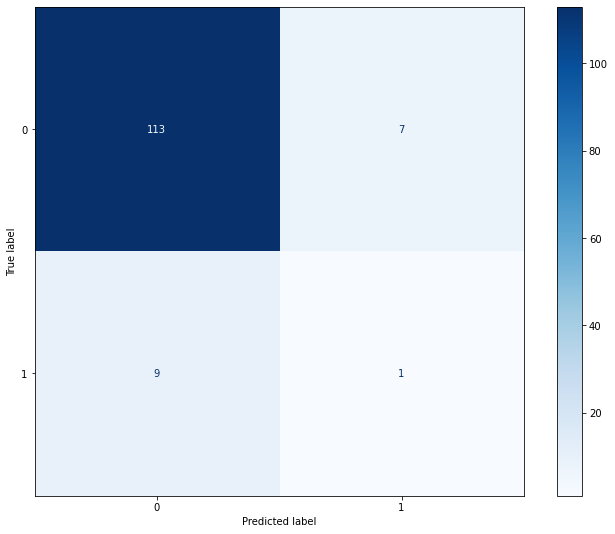

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 9))
disp = ConfusionMatrixDisplay(cnf_mt)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.grid(False)

C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


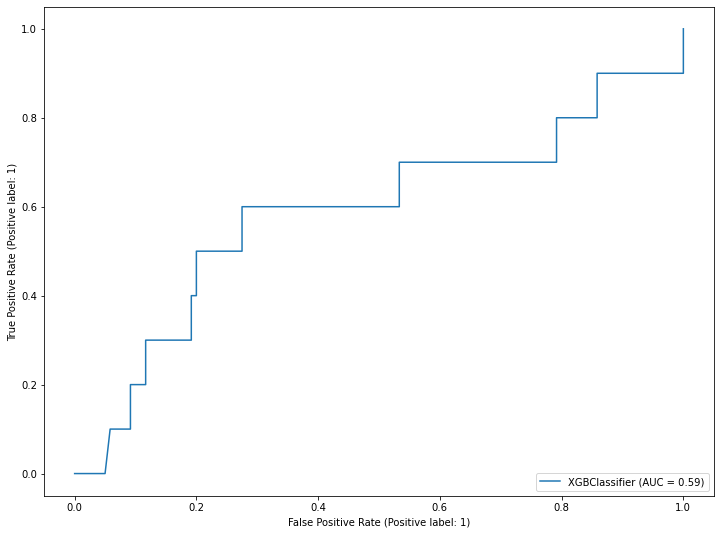

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 9))
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)